# Loading Data and Data Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
import re
import numpy as np
train  = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')
combi = train.append(test, ignore_index=True)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['User text'], "@[\w]*")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [3]:
combi.head()

,Date,Target,Tweet_id,User Name,User text,tidy_tweet
0,Sat Jun 20 10:02:00 PDT 2009,0.0,2254623107,kingsean86,People are tweeting advice on how to combat te...,People are tweeting advice on how to combat te...
1,Sat Jun 20 10:02:01 PDT 2009,0.0,2254623203,joleendoreen,"can't go 2 the anberlin show 2nite, tickets so...",can t go the anberlin show nite tickets so...
2,Sat Jun 20 10:02:01 PDT 2009,0.0,2254623331,kendel_rc,Woke up with lots of wisdom teeth drama..Gotta...,Woke up with lots of wisdom teeth drama Gotta...
3,Sat Jun 20 10:02:02 PDT 2009,0.0,2254623412,ctownson,@tom_teel Not yet dude... Gonna have to buy a ...,Not yet dude Gonna have to buy a new one
4,Sat Jun 20 10:02:03 PDT 2009,0.0,2254623626,skatinha,everytime i fall asleep my dreams are haunted,everytime i fall asleep my dreams are haunted


In [4]:
train.head()

,Target,Tweet_id,Date,User Name,User text
0,0,2254623107,Sat Jun 20 10:02:00 PDT 2009,kingsean86,People are tweeting advice on how to combat te...
1,0,2254623203,Sat Jun 20 10:02:01 PDT 2009,joleendoreen,"can't go 2 the anberlin show 2nite, tickets so..."
2,0,2254623331,Sat Jun 20 10:02:01 PDT 2009,kendel_rc,Woke up with lots of wisdom teeth drama..Gotta...
3,0,2254623412,Sat Jun 20 10:02:02 PDT 2009,ctownson,@tom_teel Not yet dude... Gonna have to buy a ...
4,0,2254623626,Sat Jun 20 10:02:03 PDT 2009,skatinha,everytime i fall asleep my dreams are haunted


In [5]:
test.head()

,Tweet_id,User text
0,2202445295,@djoneiro your multiple message tweet made me ...
1,2202445433,hmm...spoke too soon...yup...the rebuffering h...
2,2202445734,@iloveyoutoomuch are u back online ...haha
3,2202445797,@bureyean I misss you tooo bubbbs
4,2202446311,Can't wait to try them all. I was a little dis...


# Tokenization and Visualization

In [6]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [People, are, tweeting, advice, on, how, to, c...
1    [can, t, go, the, anberlin, show, nite, ticket...
2    [Woke, up, with, lots, of, wisdom, teeth, dram...
3    [Not, yet, dude, Gonna, have, to, buy, a, new,...
4    [everytime, i, fall, asleep, my, dreams, are, ...
Name: tidy_tweet, dtype: object

In [7]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

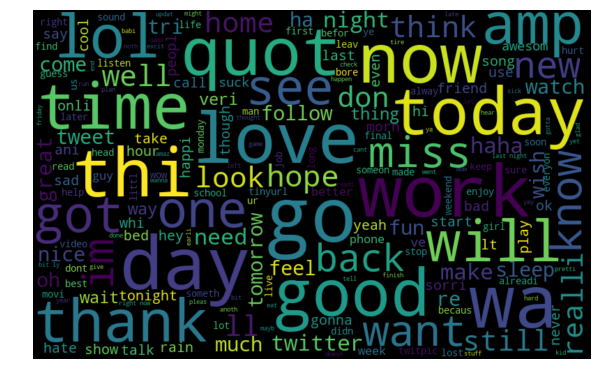

In [15]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

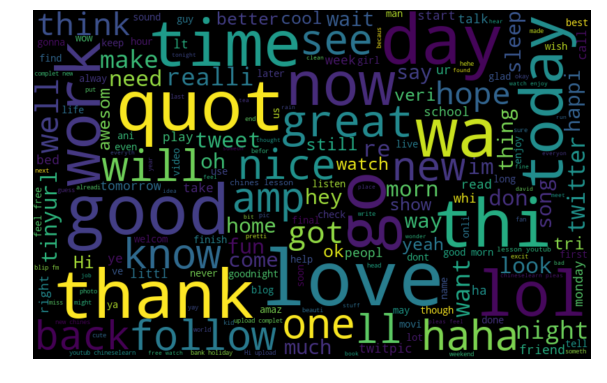

In [16]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['Target'] == 4]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

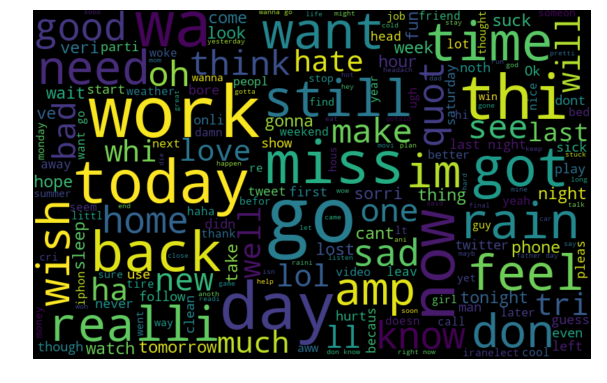

In [17]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['Target'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

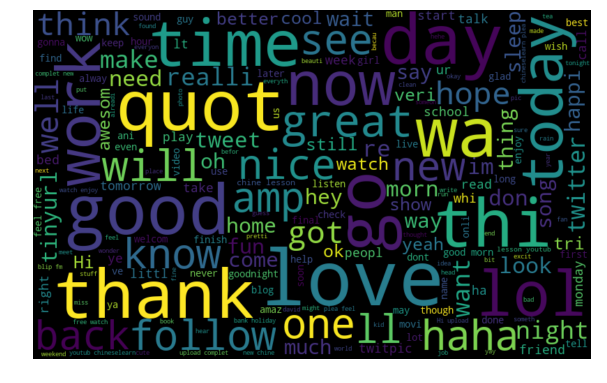

In [11]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['Target'] == 4]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Decision Tree Classification

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
train_bow = bow[:3465,:]
test_bow = bow[3465:,:]

In [20]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['Target'], random_state=42, test_size=0.4)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_bow)
X_train_tfidf.shape

(2079, 1000)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
dtree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
dtree_gini.fit(X_train_tfidf,ytrain) 
prediction1=dtree_gini.predict(xvalid_bow)
print (confusion_matrix(yvalid,prediction1))
print('\n')
print (classification_report(yvalid,prediction1))
print ("Accuracy is ",accuracy_score(yvalid,prediction1)*100)

[[ 74 528]
 [ 12 772]]


              precision    recall  f1-score   support

           0       0.86      0.12      0.22       602
           4       0.59      0.98      0.74       784

   micro avg       0.61      0.61      0.61      1386
   macro avg       0.73      0.55      0.48      1386
weighted avg       0.71      0.61      0.51      1386

Accuracy is  61.038961038961034


# Naive Bayes

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, ytrain)
text_clf = Pipeline([('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train_tfidf, ytrain)
import numpy as np
predicted = text_clf.predict(xvalid_bow)
np.mean(predicted == yvalid)

0.7034632034632035

In [26]:
print (classification_report(yvalid,predicted))

              precision    recall  f1-score   support

           0       0.74      0.49      0.59       602
           4       0.69      0.87      0.77       784

   micro avg       0.70      0.70      0.70      1386
   macro avg       0.72      0.68      0.68      1386
weighted avg       0.71      0.70      0.69      1386



# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
fitted_forest = rfc.fit(X_train_tfidf,ytrain)
predicted_forest = fitted_forest.predict(xvalid_bow)
print (classification_report(yvalid,predicted_forest))
print ("Accuracy is ",accuracy_score(yvalid,predicted_forest)*100) 

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       602
           4       0.74      0.64      0.69       784

   micro avg       0.67      0.67      0.67      1386
   macro avg       0.67      0.67      0.67      1386
weighted avg       0.68      0.67      0.67      1386

Accuracy is  66.88311688311688


# SVM

In [28]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])
text_clf_svm = text_clf_svm.fit(X_train_tfidf, ytrain)
predicted_svm = text_clf_svm.predict(xvalid_bow)
a=np.mean(predicted_svm == yvalid)
print (classification_report(yvalid,predicted_svm))
print("Accuracy",a)

              precision    recall  f1-score   support

           0       0.70      0.62      0.66       602
           4       0.73      0.80      0.76       784

   micro avg       0.72      0.72      0.72      1386
   macro avg       0.71      0.71      0.71      1386
weighted avg       0.72      0.72      0.72      1386

Accuracy 0.7186147186147186


In [29]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1).fit(X_train_tfidf, ytrain)
predicted= svc.predict(xvalid_bow)
from sklearn.metrics import accuracy_score
print (classification_report(yvalid,predicted))
print (accuracy_score(yvalid, predicted))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       602
           4       0.73      0.77      0.75       784

   micro avg       0.71      0.71      0.71      1386
   macro avg       0.71      0.70      0.71      1386
weighted avg       0.71      0.71      0.71      1386

0.7128427128427128


# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train_tfidf, ytrain)
prediction = lreg.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.5
test_pred_int = test_pred_int.astype(np.int)
test['Target'] = test_pred_int
submission = test[['Tweet_id','Target']]
submission.to_csv('lr.csv', index=False) # writing data to a CSV file
def model_accuracy(testing_model, features, targets):
     accuracy_score = testing_model.score(xvalid_bow, yvalid)
     return accuracy_score
test_accuracy = model_accuracy(lreg, xvalid_bow, yvalid)
print(test_accuracy)

0.7229437229437229


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:

from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train_tfidf, ytrain)
model.score(xvalid_bow,yvalid)

0.6082251082251082

In [32]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train_tfidf, ytrain)
model.score(xvalid_bow,yvalid)

0.6746031746031746